In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


도형의 개수: 3(3)


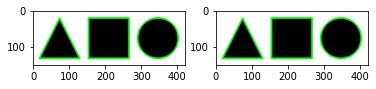

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/shapes.png')
img2 = img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, imthres = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) # 배경/전경을 반전
# findContoures함수를 사용하려면 "검정 배경"에 "흰색 전경"으로 표현된 바이너리 이미지를 전달해야함

# 가장 바깥쪽 컨투어의 모든 좌표 반환
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# 가장 바깥쪽 컨투어의 꼭지점 좌표만 반환
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# contour, contour2 각각 리스트 형태이며 리스트의 길이는 도형의 수와 같다
print('도형의 개수: {}({})'.format(len(contour), len(contour2)))

cv2.drawContours(img, contour, -1, (0,255,0), 4)
cv2.drawContours(img2, contour2, -1, (0,255,0), 4)
# 꼭지점 좌표를 연결해도 선처럼 나온다

imgs = {"img":img, "img2":img2}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.imshow(v)